In [1]:
# This software implements face and upper torso detection using a trained CV model,
# as well as to determine the skin color of the faces detected in the images.
# This code is created in Jupyter Notebook environment.
# Created by Dusan Radivojevic 27.02.2022

In [2]:
import pixellib
from pixellib.instance import custom_segmentation
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")
def process_image(source_image_path):
    """
    This method detect faces and upper torso from image that path is passed to as argument.
    It saves and print the image with the result of the object detection and segmentation.
    It returns segmented data due to the possibility of further processing.
    Example code:
        segmask = process_image('example.JPG')
    """
    segment_image = custom_segmentation()
    segment_image.inferConfig(num_classes= 2, class_names= ["BG","face","upper_torso"], network_backbone = "resnet101", detection_threshold = 0.5, image_max_dim = 512, image_min_dim = 512)
    segment_image.load_model("mask_rcnn_model.069-0.321938.h5")
    segmask, output = segment_image.segmentImage(source_image_path, show_bboxes=True, output_image_name="Output_img.jpg", extract_segmented_objects= True)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    return segmask

In [ ]:
# Take photo from camera

camera = cv2.VideoCapture(0)
return_value, image = camera.read()
del(camera)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('camera.jpg', image)
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Processed image saved successfully in your current working directory.


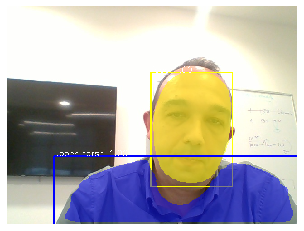

In [3]:
# Detect faces and upper torsoes

segmask = process_image('camera.jpg')#example.jpg

In [4]:
# Finding the color of faces segmented from the original image

import cv2
import numpy as np
import webcolors

def closest_colour(requested_colour):
    """This method returns the name of the closest color based on the RGB code.
    """
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def find_face_color(segmask):
    """ Finding color of all faces detected by the method 'process_image'
    """
    Faces = []
    for i in range(len(segmask['class_ids'])):
        if segmask['class_ids'][i]==1:
            Faces.append(cv2.cvtColor(segmask['extracted_objects'][i], cv2.COLOR_BGR2RGB))
    for face in Faces:
        RGB_sum=[]
        face = list(face)
        for i in range(len(face)):
            for j in range(len(face[i])):
                R=face[i][j][0]
                G=face[i][j][1]
                B=face[i][j][2]
            if (R+G+B)>0:
                RGB_sum.append([R,G,B])
        rgb_color = np.mean(np.array(RGB_sum).reshape(-1,3),axis=0).astype(int)
        plt.axis('off')
        plt.title('Face color: '+closest_colour(rgb_color).upper()+' or RGB: '+str(rgb_color))
        plt.imshow(face)
        plt.show()

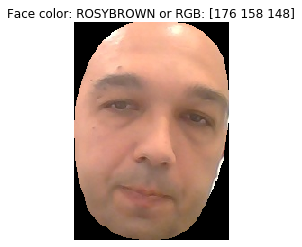

In [5]:
# Find and print faces and colours

find_face_color(segmask)